In [46]:
## plot the histogram showing the modeled and labeled result 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [51]:
# for loop version
def read_comp(file):
    Pwave = {}
    Pwave['correct'] = []
    Pwave['wrongphase'] = []
    Pwave['miss'] = 0
    Pwave['multiphase'] = []    
    
    with open(file, 'r') as comp:
         for line in comp:
            pickline = line.split(',')
            if pickline[0].strip()[-1] == pickline[1].strip() and len(pickline)==3:
                Pwave['correct'].append(float(pickline[2][:-2]))
            if pickline[0].strip()[-1] != pickline[1].strip() and pickline[1].strip() != 'N':
                Pwave['wrongphase'].append (float(pickline[2][:-2]))
            if pickline[0].strip()[-1] == pickline[1].strip() and len(pickline)>3:  
                Pwave['multiphase'].append(len(pickline)-2)
            if pickline[1].strip() == 'N':
                Pwave['miss'] +=1
           
    return Pwave

In [52]:
# run all the output file 
ty  = ['EQS','EQP','SUS','SUP','THS','THP','SNS','SNP','PXS','PXP']
wave = {}
for name in ty:
    wave[name] = read_comp('../comparison_out/comp.'+name+'.out')

IndexError: list index out of range

In [54]:
# plot histogram of the correct plot
def plotfig(name):
    fig, ax = plt.subplots(figsize = (10,6))
#    filename = wave['EQP']['correct']
    fig = plt.hist(name,bins= 10)
    ax.set_ylabel('number', fontsize=15)
    ax.set_xlabel('time difference (s)', fontsize=15)
    ax.set_title('Phase with time difference')
    plt.xticks(fontsize=15)
    #plt.xticks( rotation='vertical')
#    plt.xticks(np.arange(-10, 10, step=1))
    plt.yticks(fontsize=15)
    plt.legend(fontsize=15)
    #plt.savefig('test.jpg')

EQS correct
EQS wrongphase
EQS miss
EQS multiphase
EQP correct
EQP wrongphase
EQP miss
EQP multiphase
SUS correct
SUS wrongphase
SUS miss
SUS multiphase
SUP correct
SUP wrongphase
SUP miss
SUP multiphase
THS correct
THS wrongphase
THS miss
THS multiphase
THP correct
THP wrongphase


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


THP miss
THP multiphase
SNS correct
SNS wrongphase
SNS miss
SNS multiphase
SNP correct
SNP wrongphase
SNP miss
SNP multiphase
PXS correct
PXS wrongphase
PXS miss
PXS multiphase
PXP correct
PXP wrongphase
PXP miss
PXP multiphase


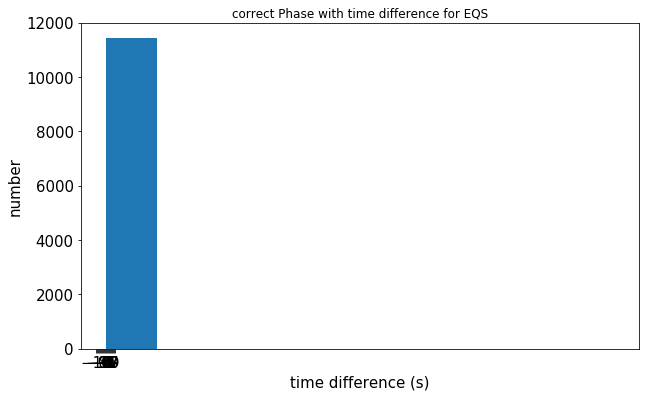

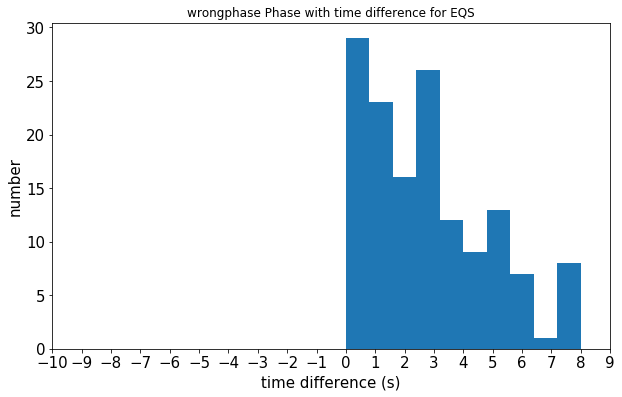

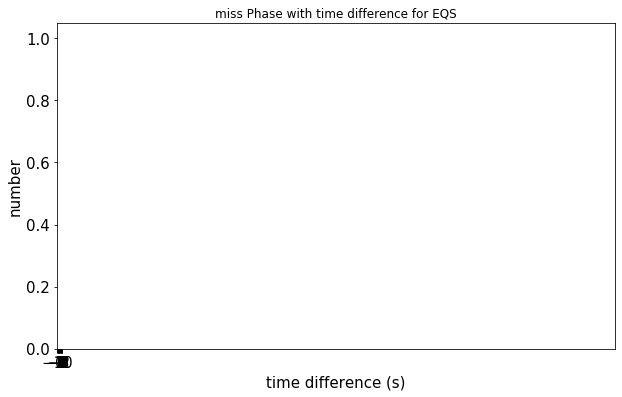

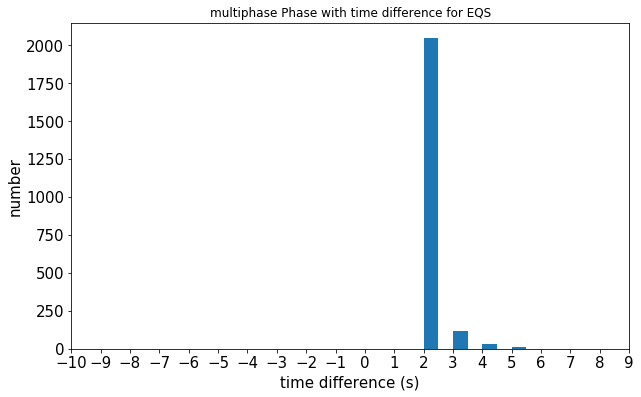

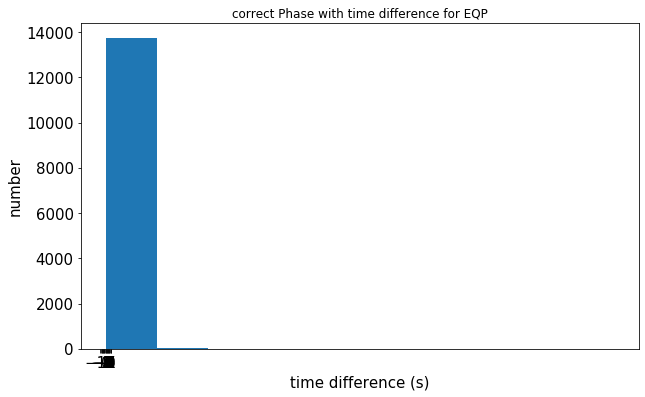

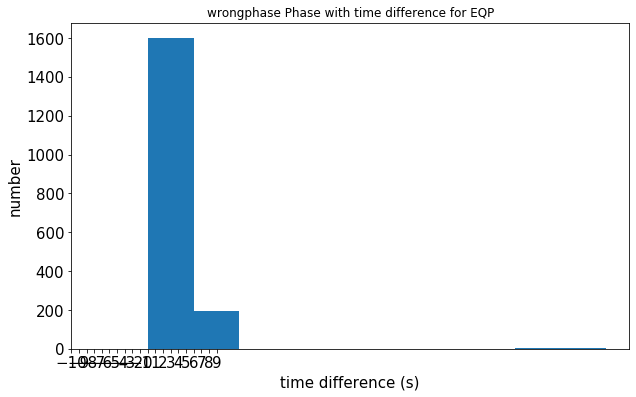

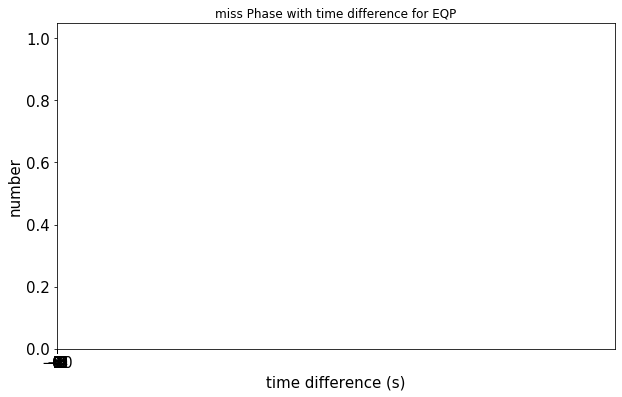

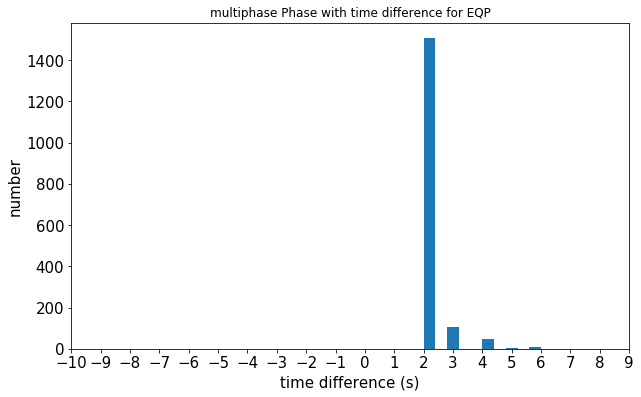

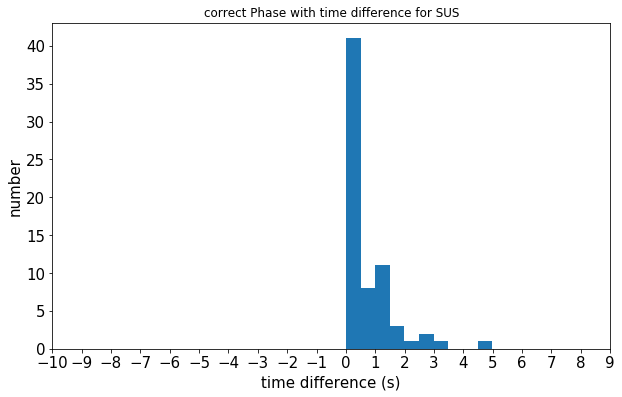

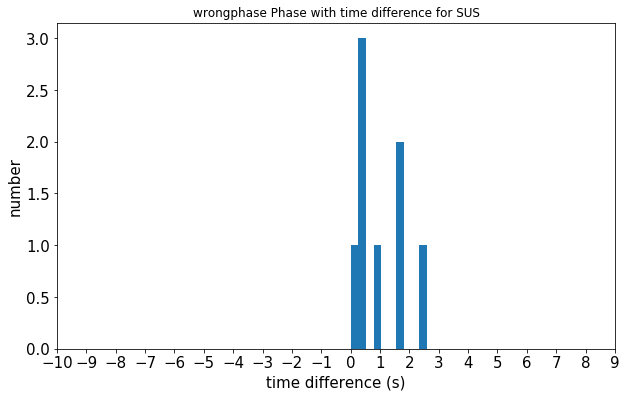

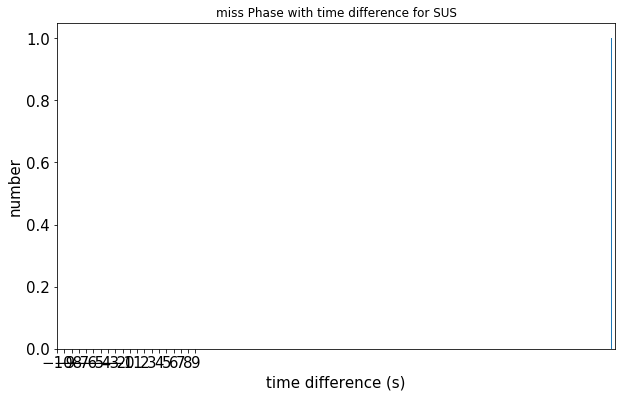

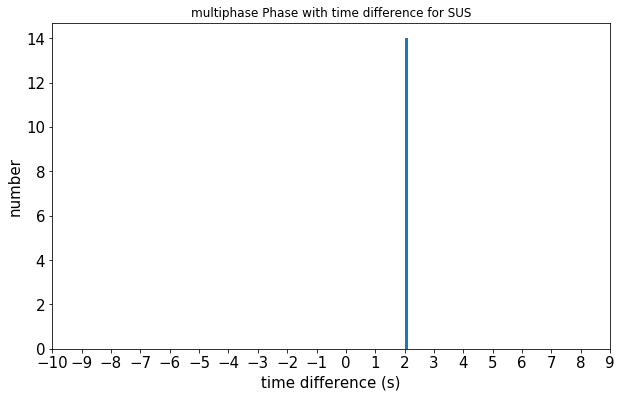

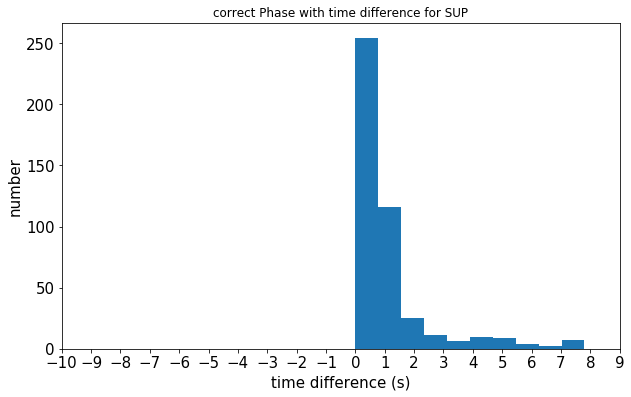

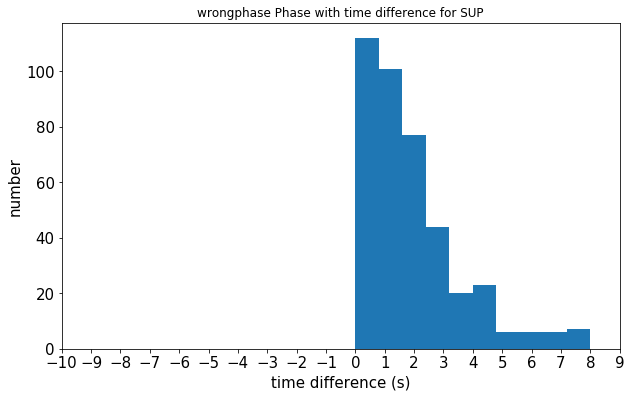

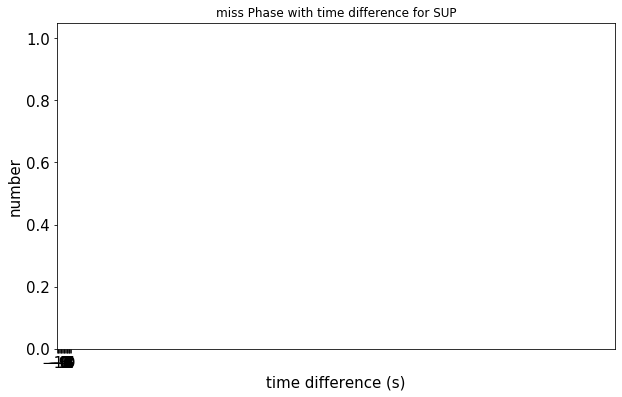

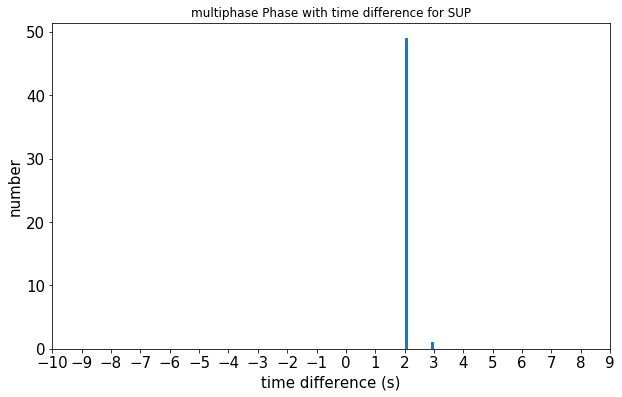

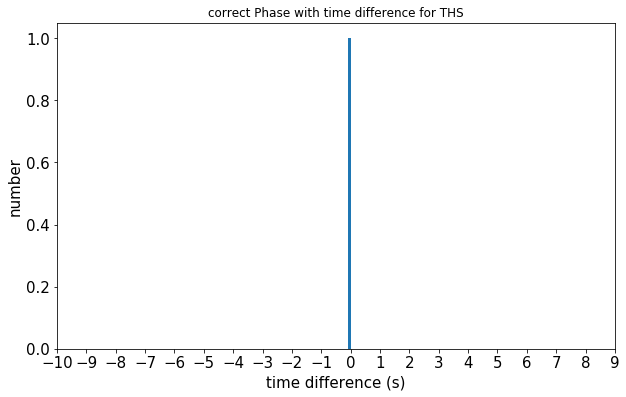

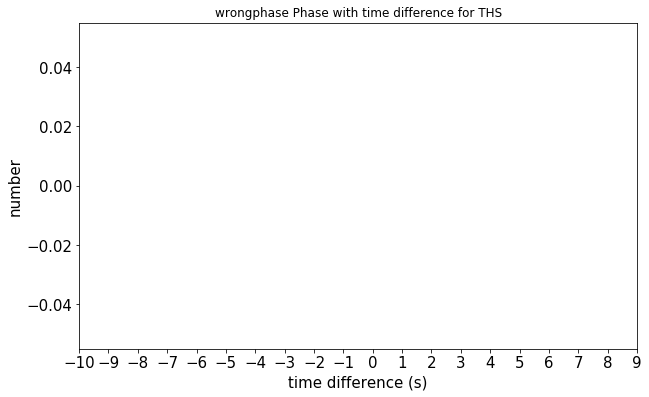

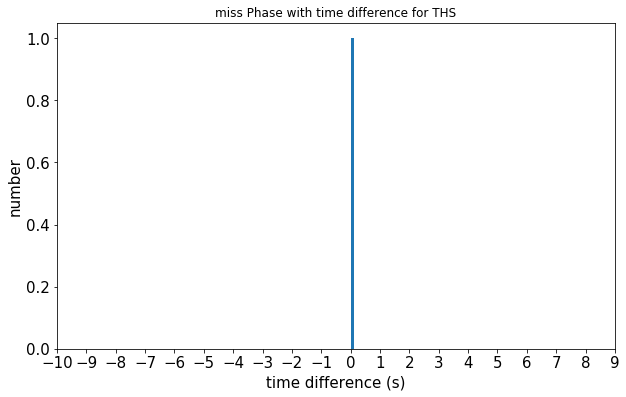

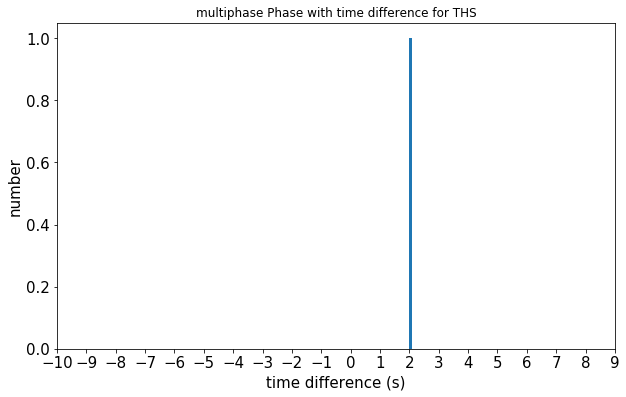

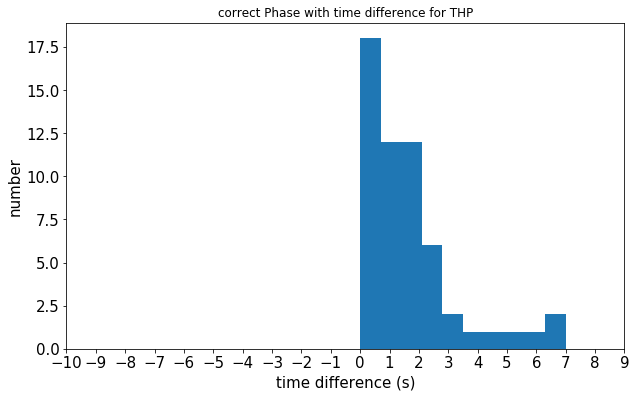

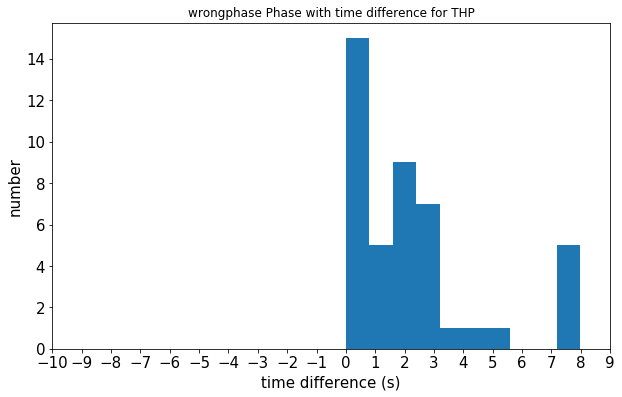

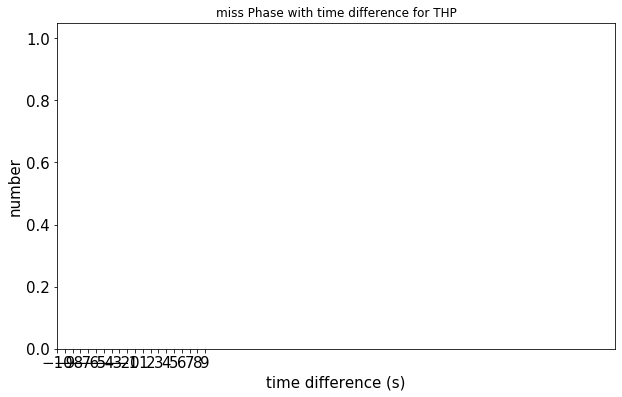

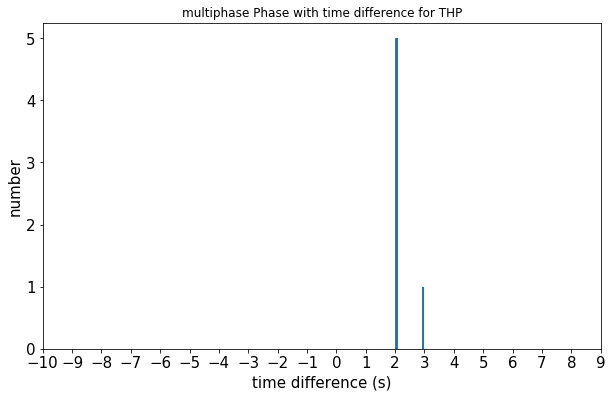

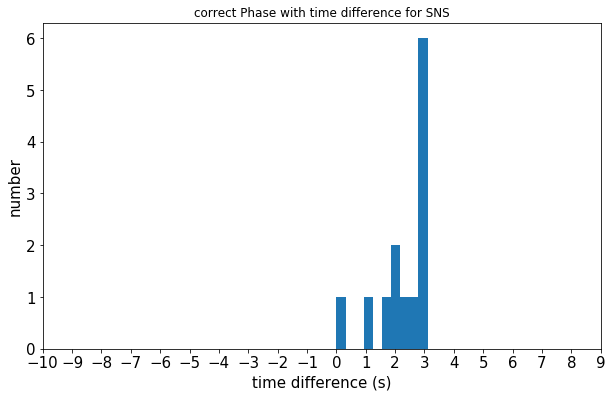

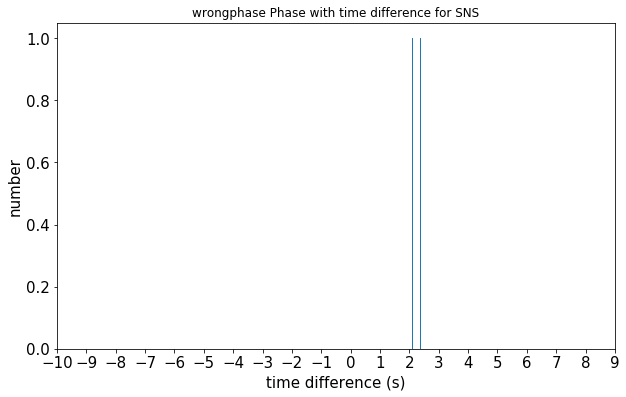

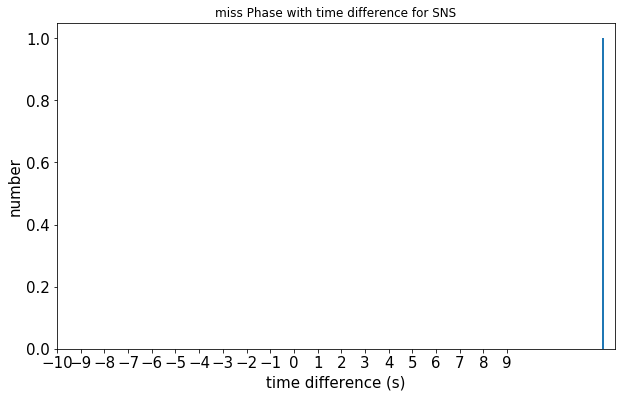

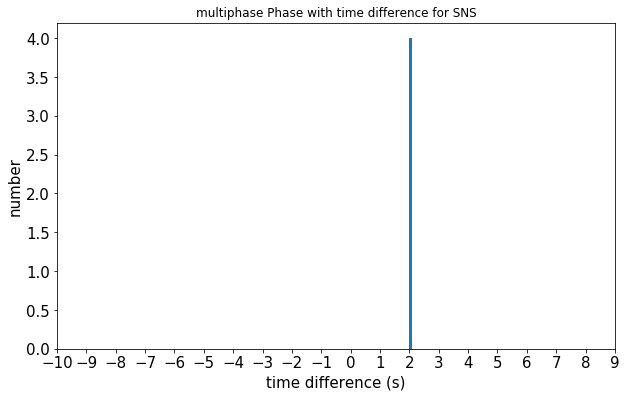

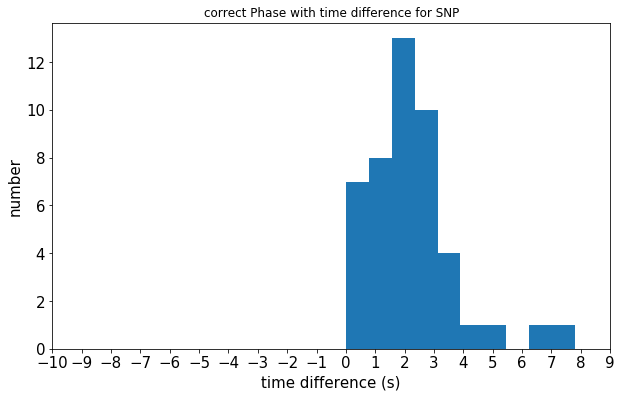

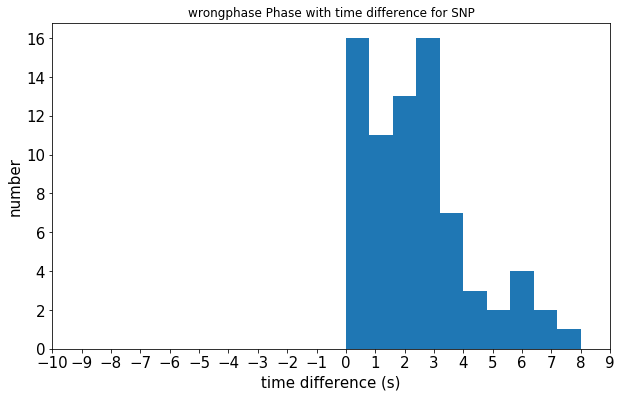

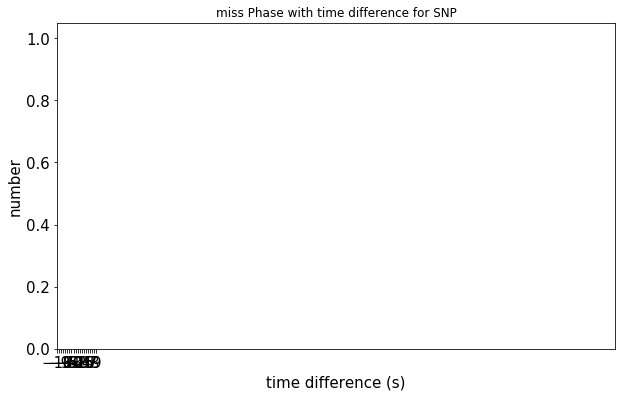

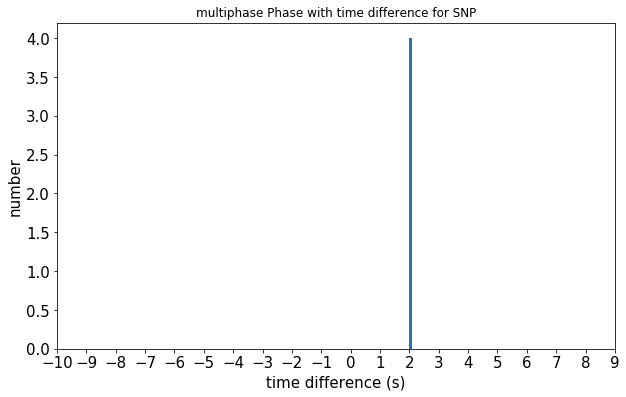

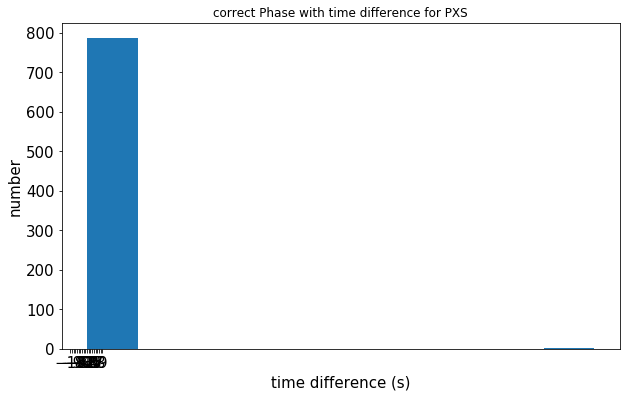

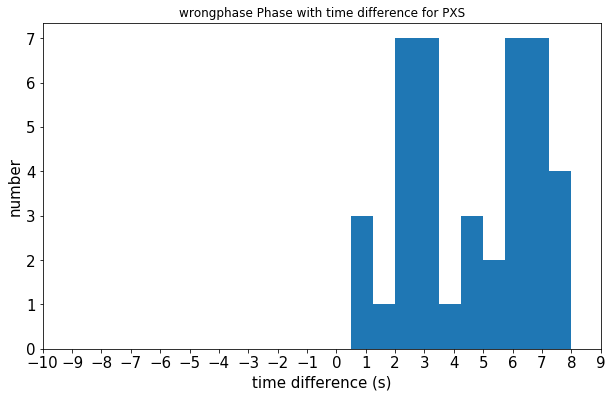

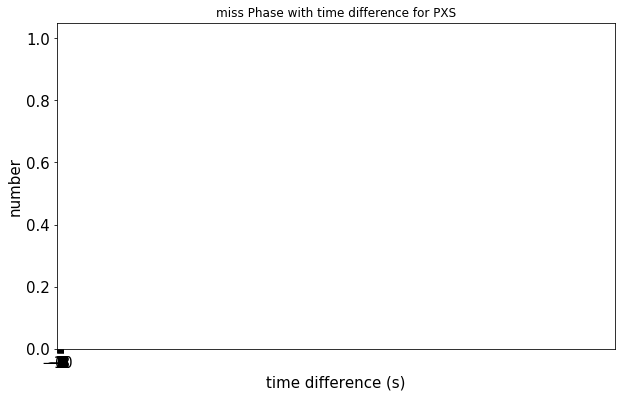

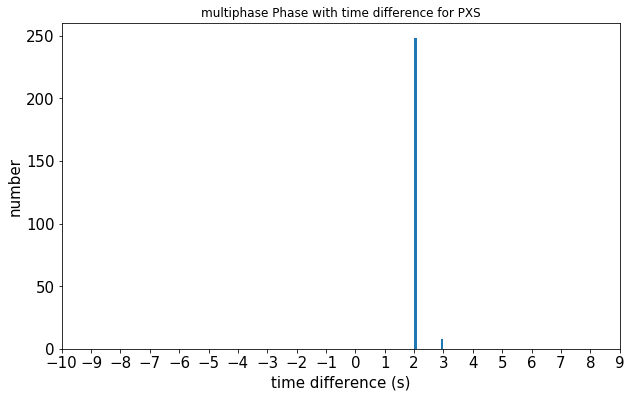

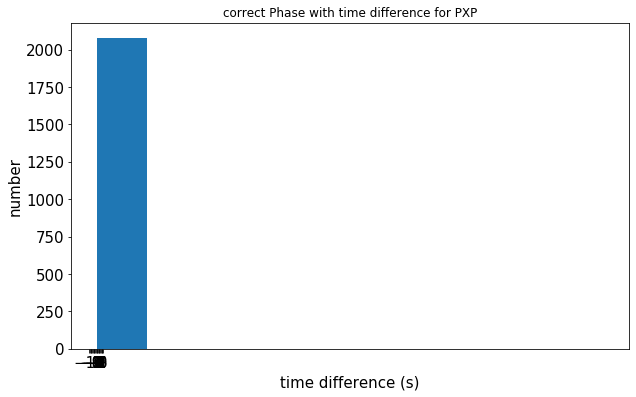

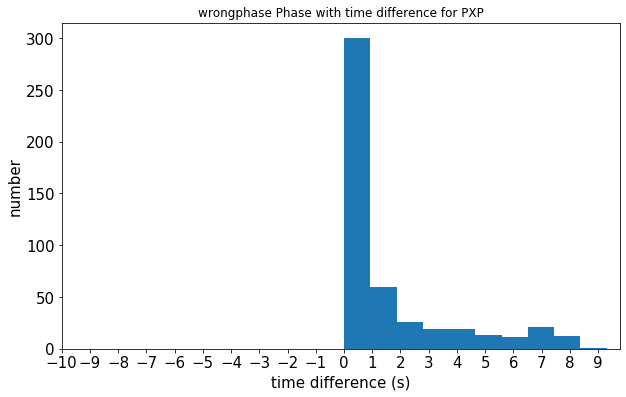

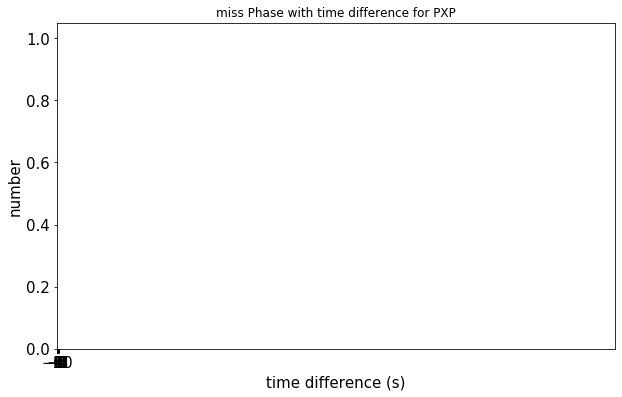

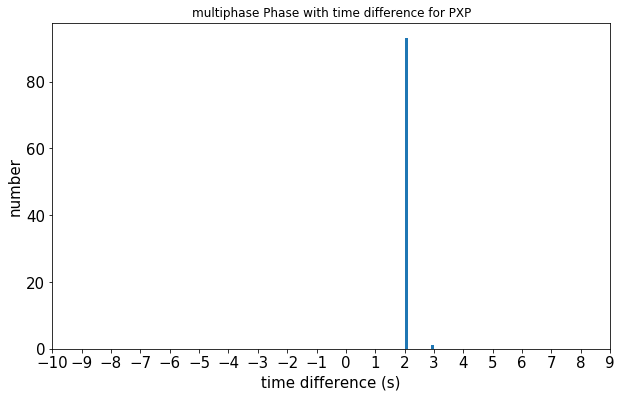

In [45]:
for k in wave.keys():
    for t in wave[k].keys():
#        print (k, t)
        fig, ax = plt.subplots(figsize = (10,6))
#    filename = wave['EQP']['correct']
        fig = plt.hist(wave[k][t],bins= 10)
        ax.set_ylabel('number', fontsize=15)
        ax.set_xlabel('time difference (s)', fontsize=15)
        ax.set_title('{} Phase with time difference for {}'.format(t,k))
        plt.xticks(fontsize=15)
        #plt.xticks( rotation='vertical')
        plt.xticks(np.arange(-10, 10, step=1))
        plt.yticks(fontsize=15)
        #plt.legend(fontsize=15)
        #plt.savefig('{}_{}.jpg'.format(k,t))

No handles with labels found to put in legend.


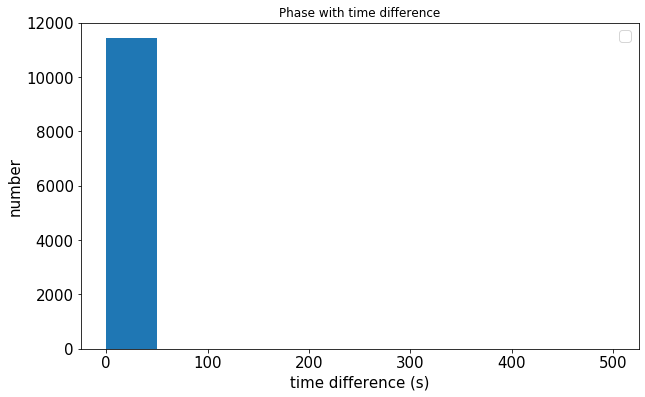

In [55]:
plotfig(wave['EQS']['correct'])

No handles with labels found to put in legend.


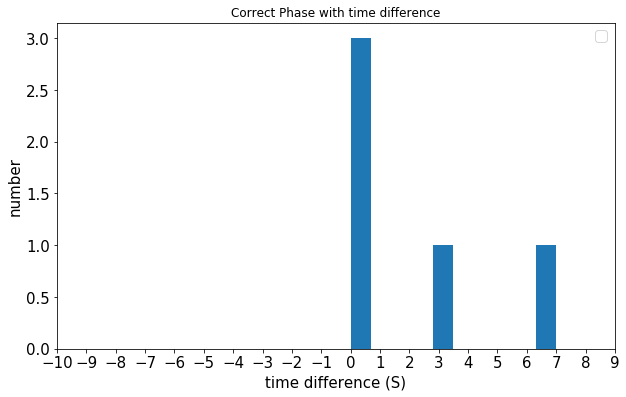

In [23]:
# plot histogram of the wrongphase plot 
fig, ax = plt.subplots(figsize = (10,6))

#k = np.random.normal(float(test['EQS'][ID]['time']), 3, 1000)
fig = plt.hist(wave['EQP']['wrongphase'])
ax.set_ylabel('number', fontsize=15)
ax.set_xlabel('time difference (S)', fontsize=15)
ax.set_title('Correct Phase with time difference')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(np.arange(-10, 10, step=1))
plt.legend(fontsize=15)

No handles with labels found to put in legend.


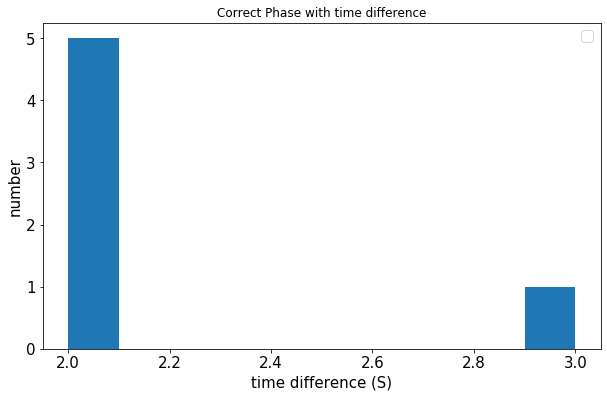

In [165]:
# plot histogram of the wrongphase plot 
fig, ax = plt.subplots(figsize = (10,6))
#k = np.random.normal(float(test['EQS'][ID]['time']), 3, 1000)
fig = plt.hist(test['multiphase'])
ax.set_ylabel('number', fontsize=15)
ax.set_xlabel('time difference (S)', fontsize=15)
ax.set_title('Correct Phase with time difference')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.xticks(np.arange(-10, 10, step=1))
plt.legend(fontsize=15)

In [87]:
comp = pd. read_csv('../comparison.out', names=['type','mod_type','time'],sep = ' ')
comp.head()                   

,type,mod_type,time
0,EQS,N,NaN
1,EQP,N,NaN
2,EQS,N,NaN
3,EQP,N,NaN
4,EQS,N,NaN


In [91]:
comp['mod_type'].value_counts()

N    76767
P       58
S       47
Name: mod_type, dtype: int64

In [137]:
comp['time'][comp['type']=='THP'].describe()

count    104.000000
mean       1.415390
std        1.072226
min        0.000470
25%        0.500750
50%        1.301450
75%        2.101310
max        4.601530
Name: time, dtype: float64

In [35]:
comp = pd. read_csv('../comparison_out/comp.EQP.out', sep = '/s+')
comp.head()  

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,"EQP P, 0.07738"
0,"EQP P, 0.04239"
1,"EQP P, 0.00123"
2,"EQP P, 0.00053"
3,"EQP P, 0.09687"
4,"EQP P, 0.02732"


In [148]:
with open('../comparison_out/comp.EQP.out', 'r') as comp:
    leng = []
    for line in comp:
        pickline = line.split(' ')
        leng.append(len(pickline))

In [149]:
max(leng)

6